In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



/tmp/ipykernel_5328/3379503730.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data.index = pd.to_datetime(data['id'], errors='ignore')
/tmp/ipykernel_5328/3379503730.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data.index = data['id'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], errors='ignore'))


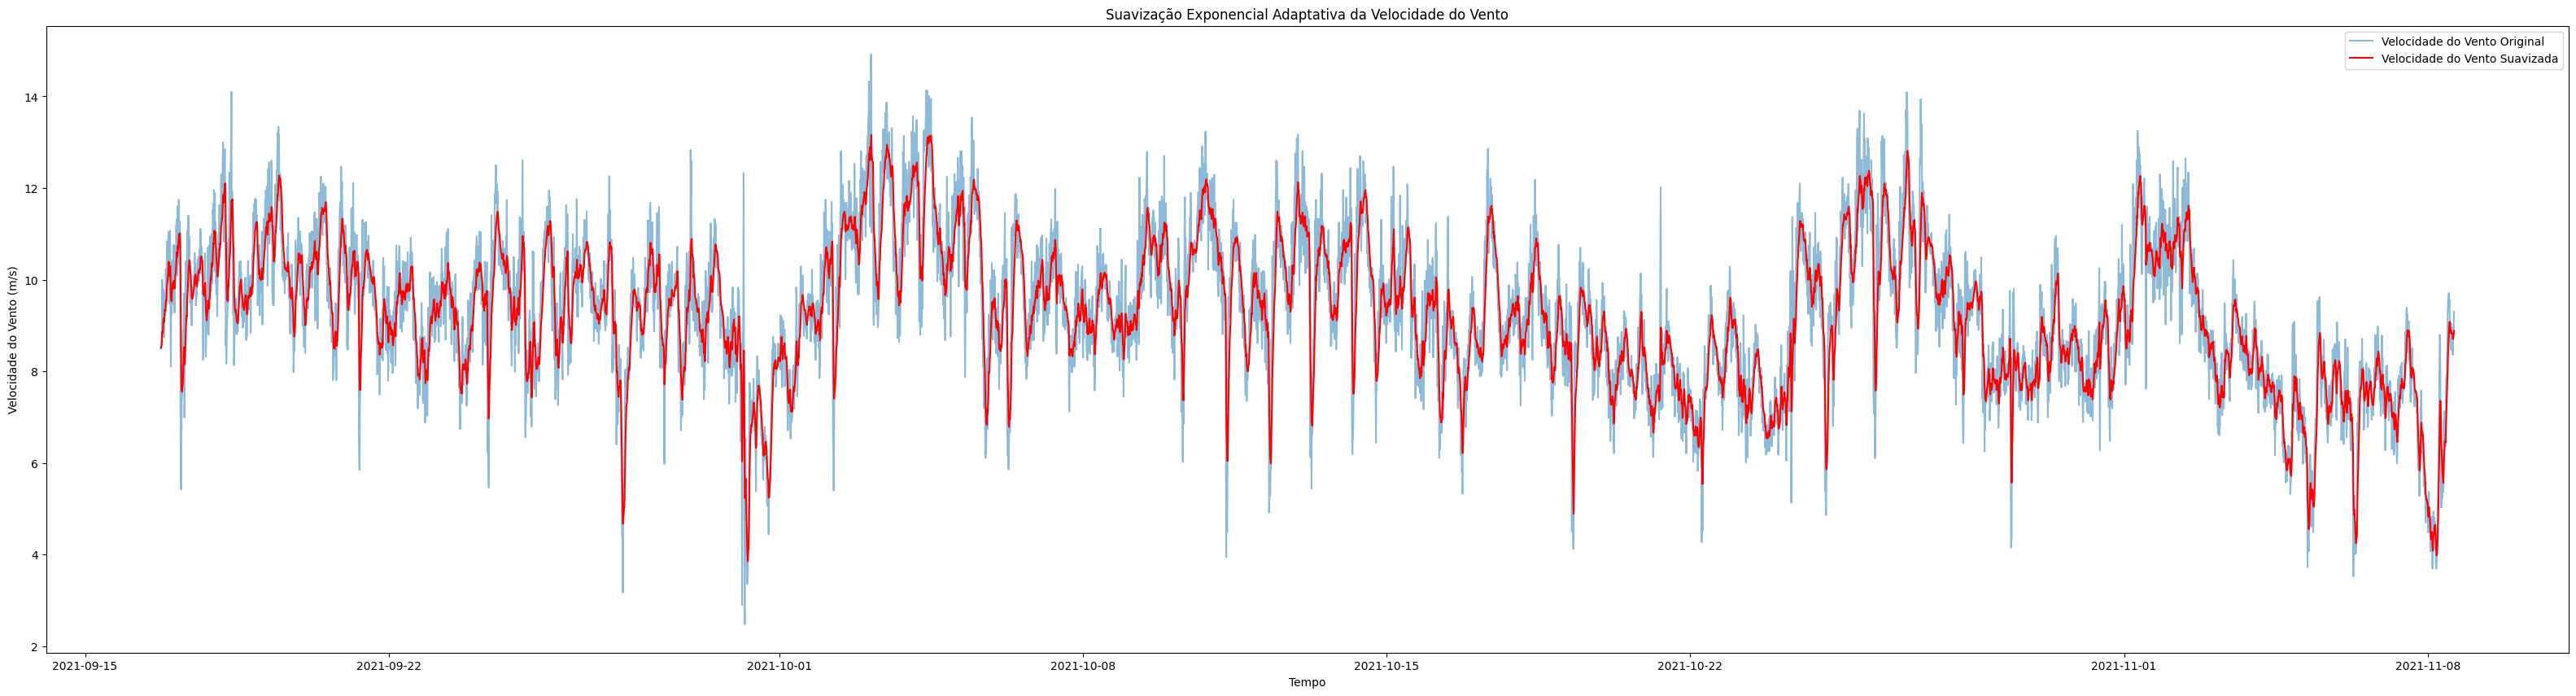

In [26]:
# Carregar o dataset
data = pd.read_csv("dataset.csv")
data.index = pd.to_datetime(data['id'], errors='ignore')
data.index = data['id'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], errors='ignore'))

min_wind = data['ws100'].min()
max_wind = data['ws100'].max()

# Remover outliers usando o método do desvio padrão


# 3. Definir a Função de Suavização Exponencial Adaptativa
def adaptive_exponential_smoothing(data, min_alpha=0.1, max_alpha=0.3, min_wind=4, max_wind=15):
    """
    Aplica suavização exponencial adaptativa aos dados.
    
    Parâmetros:
    - data: pandas Series com os dados de velocidade do vento
    - min_alpha: valor mínimo de alpha para altas velocidades (menos suavização)
    - max_alpha: valor máximo de alpha para baixas velocidades (mais suavização)
    - min_wind: velocidade mínima do vento
    - max_wind: velocidade máxima do vento
    
    Retorna:
    - pandas Series com os dados suavizados
    """
    smoothed = []
    previous = data.iloc[0]  # Inicializa com o primeiro valor
    
    for wind in data:
        # Normaliza a velocidade do vento entre 0 e 1
        normalized = (wind - min_wind) / (max_wind - min_wind)
        # Garante que o valor esteja entre 0 e 1
        normalized = np.clip(normalized, 0, 1)
        # Define alpha inversamente proporcional à suavização desejada
        alpha = min_alpha + (max_alpha - min_alpha) * (1 - normalized)
        # Aplica a fórmula de suavização exponencial
        current = alpha * wind + (1 - alpha) * previous
        smoothed.append(current)
        previous = current
    
    return pd.Series(smoothed, index=data.index)

# 4. Aplicar a Função de Suavização
data['wind_speed_smoothed'] = adaptive_exponential_smoothing(data['ws100'], min_wind=min_wind, max_wind=max_wind)

# 5. Visualizar os Resultados
plt.figure(figsize=(40, 10))
plt.plot(data.index, data['ws100'], label='Velocidade do Vento Original', alpha=0.5)
plt.plot(data.index, data['wind_speed_smoothed'], label='Velocidade do Vento Suavizada', color='red')
plt.xlabel('Tempo')
plt.ylabel('Velocidade do Vento (m/s)')
plt.title('Suavização Exponencial Adaptativa da Velocidade do Vento')
plt.legend()
plt.show()